# Explore here

In [33]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
main_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [35]:
main_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [37]:
main_df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [38]:
main_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [39]:
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Axes: xlabel='Longitude', ylabel='Latitude'>

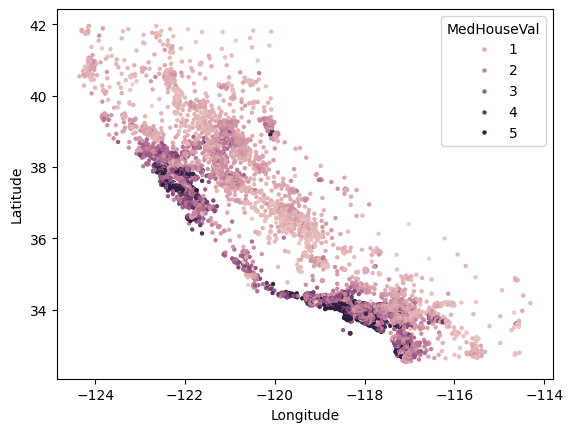

In [40]:
sns.scatterplot(data=main_df, x='Longitude', y='Latitude', hue='MedHouseVal', linewidth = 0, s=10)

<Axes: xlabel='Longitude', ylabel='Latitude'>

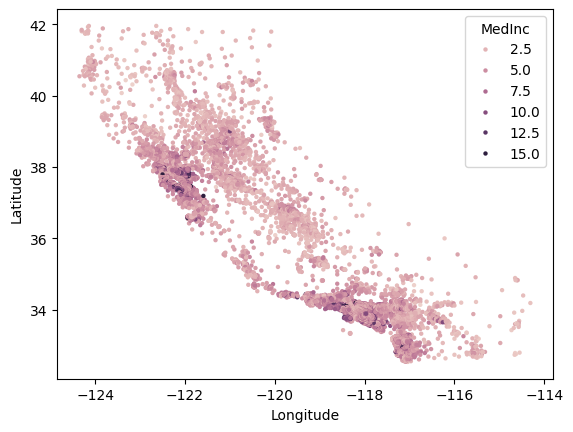

In [41]:
sns.scatterplot(data=main_df, x='Longitude', y='Latitude', hue='MedInc', linewidth = 0, s=10)

<Axes: xlabel='Longitude', ylabel='Latitude'>

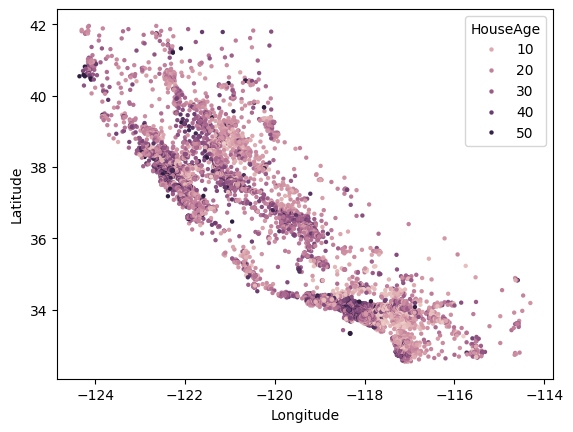

In [42]:
sns.scatterplot(data=main_df, x='Longitude', y='Latitude', hue='HouseAge', linewidth = 0, s=10)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = main_df[['Latitude', 'Longitude', 'MedInc']]

In [45]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state = 4)

In [46]:
from sklearn.cluster import KMeans

In [47]:
cluster_model = KMeans(n_clusters = 6)

cluster_model.fit(X_train)

KMeans(n_clusters=6)

In [48]:
train_preds = cluster_model.predict(X_train)

In [49]:
test_preds = cluster_model.predict(X_test)

In [50]:
X_train['cluster'] = train_preds

In [51]:
X_test['cluster'] = test_preds

In [52]:
X_train['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 461      4
12085    5
11333    1
175      4
42       4
        ..
16840    0
11863    4
17093    4
8366     1
17530    4
Name: cluster, Length: 15480, dtype: int32>

In [53]:
X_test['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 6939     1
8032     5
18877    4
4882     1
5409     5
        ..
11292    5
8941     1
2431     2
3706     1
13826    1
Name: cluster, Length: 5160, dtype: int32>

In [54]:
X_train

,Latitude,Longitude,MedInc,cluster
461,37.87,-122.26,1.1859,4
12085,33.89,-117.34,5.3630,5
11333,33.75,-117.96,2.7800,1
175,37.80,-122.24,2.1563,4
42,37.84,-122.26,1.0250,4
...,...,...,...,...
16840,37.63,-122.46,5.0479,0
11863,40.31,-121.24,3.5962,4
17093,37.48,-122.23,2.7969,4
8366,33.97,-118.35,2.6734,1


<Axes: xlabel='Longitude', ylabel='Latitude'>

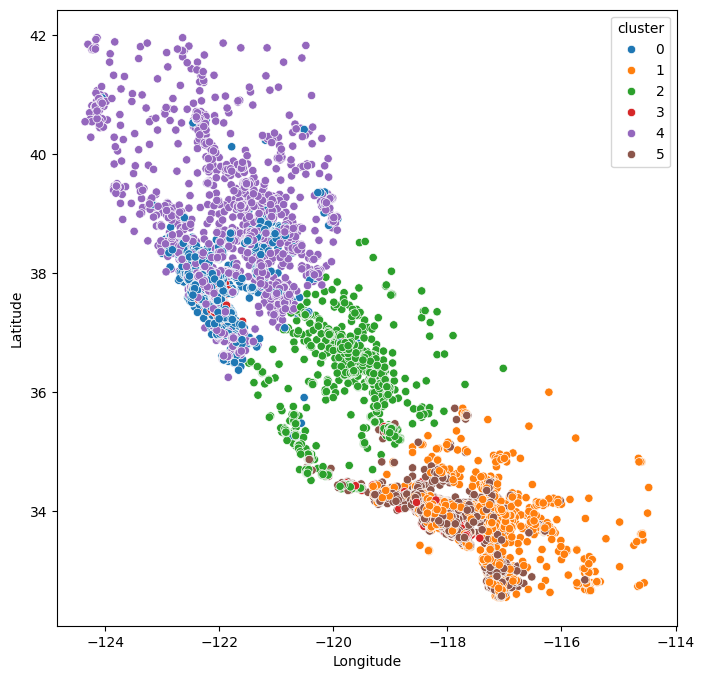

In [55]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=X_train, x = 'Longitude', y='Latitude', hue='cluster', palette='tab10')

<Axes: xlabel='Longitude', ylabel='Latitude'>

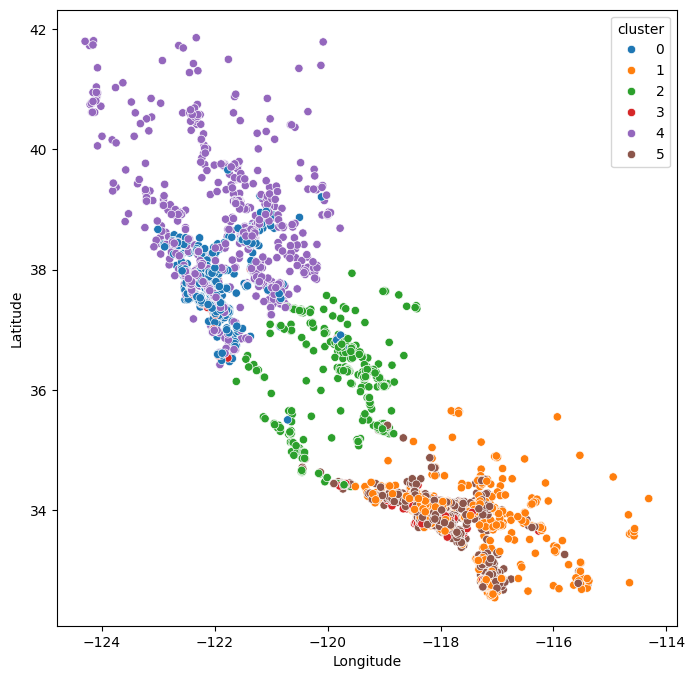

In [56]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=X_test, x = 'Longitude', y='Latitude', hue='cluster', palette='tab10')

In [57]:
#from scipy.cluster.hierarchy import dendrogram, linkage

In [58]:
#Z = linkage(X_train, method = "complete")

In [59]:
#dendrogram(Z)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
X_train_new = X_train.drop(columns = 'cluster')

In [62]:
X_test_new = X_test.drop(columns = 'cluster')

In [63]:
y_train = X_train['cluster']
y_test = X_test['cluster']

In [64]:
logreg_model = LogisticRegression()

logreg_model.fit(X_train_new, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
log_train_preds = logreg_model.predict(X_train_new)
log_test_preds = logreg_model.predict(X_test_new)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
accuracy_score(y_train, log_train_preds)

0.9153100775193799

In [68]:
accuracy_score(y_test, log_test_preds)

0.9178294573643411

In [69]:
confusion_matrix(y_train, log_train_preds)

array([[1979,    0,   22,    7,   70,    6],
       [   0, 4810,   95,    0,    1,   53],
       [  63,  193,  511,    0,  446,   37],
       [   8,    0,    0,  368,    0,   21],
       [  20,    0,  178,    0, 3419,    0],
       [  17,   65,    2,    7,    0, 3082]])

In [70]:
confusion_matrix(y_test, log_test_preds)

array([[ 657,    0,   11,    5,   24,    1],
       [   0, 1599,   25,    0,    1,   15],
       [  17,   77,  179,    0,  135,   12],
       [   2,    0,    0,  111,    0,    7],
       [   8,    0,   63,    0, 1175,    0],
       [   3,   16,    1,    1,    0, 1015]])

In [71]:
print(classification_report(y_train, log_train_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2084
           1       0.95      0.97      0.96      4959
           2       0.63      0.41      0.50      1250
           3       0.96      0.93      0.94       397
           4       0.87      0.95      0.91      3617
           5       0.96      0.97      0.97      3173

    accuracy                           0.92     15480
   macro avg       0.89      0.86      0.87     15480
weighted avg       0.91      0.92      0.91     15480



In [72]:
print(classification_report(y_test, log_test_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       698
           1       0.95      0.97      0.96      1640
           2       0.64      0.43      0.51       420
           3       0.95      0.93      0.94       120
           4       0.88      0.94      0.91      1246
           5       0.97      0.98      0.97      1036

    accuracy                           0.92      5160
   macro avg       0.89      0.87      0.87      5160
weighted avg       0.91      0.92      0.91      5160

